This notebook computes a the n-th image of a circle with radius $r$ on the equatorial, and creates a new lensing band file. 

To do so, modify params as:

<code> imag_cut=2 </code>

<code> r_cutoff=20 </code>


Feel free to use this code (**with attribution to Ref. [1]**) for your research or to produce visualizations for your next presentation! 

In [1]:
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



We check we are indeed reading these params

In [2]:
print(imag_cut,"\n",r_cutoff)

2 
 20


# Computation of the lensing bands

In [3]:
%time !python lensingbands.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  6250000
Number of points in the n=1 grid  6250000
Number of points in the n=2 grid  6250000
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 148 ms, sys: 60.2 ms, total: 209 ms
Wall time: 34.7 s


In [4]:
%time !python raytracing.py

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 18750000 photons were ray-traced
CPU times: user 236 ms, sys: 100 ms, total: 336 ms
Wall time: 57.8 s


## Reading the output of the lensing bands calculation

In [5]:
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])

supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])

h5f.close()

Reading file:  ./Results/LensingBands_a_0.94_i_17.h5


### Reading the output of the ray-tracing

In [6]:
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs1=h5f['rs1'][:]

h5f.close()

Reading file:  ./Results/Rays_a_0.94_i_17.h5


## Plotting the results

Let us now plot the boundaries of the lensing bands and just the grid points of the n=1 lensing band. As well as how good the selected radius look.

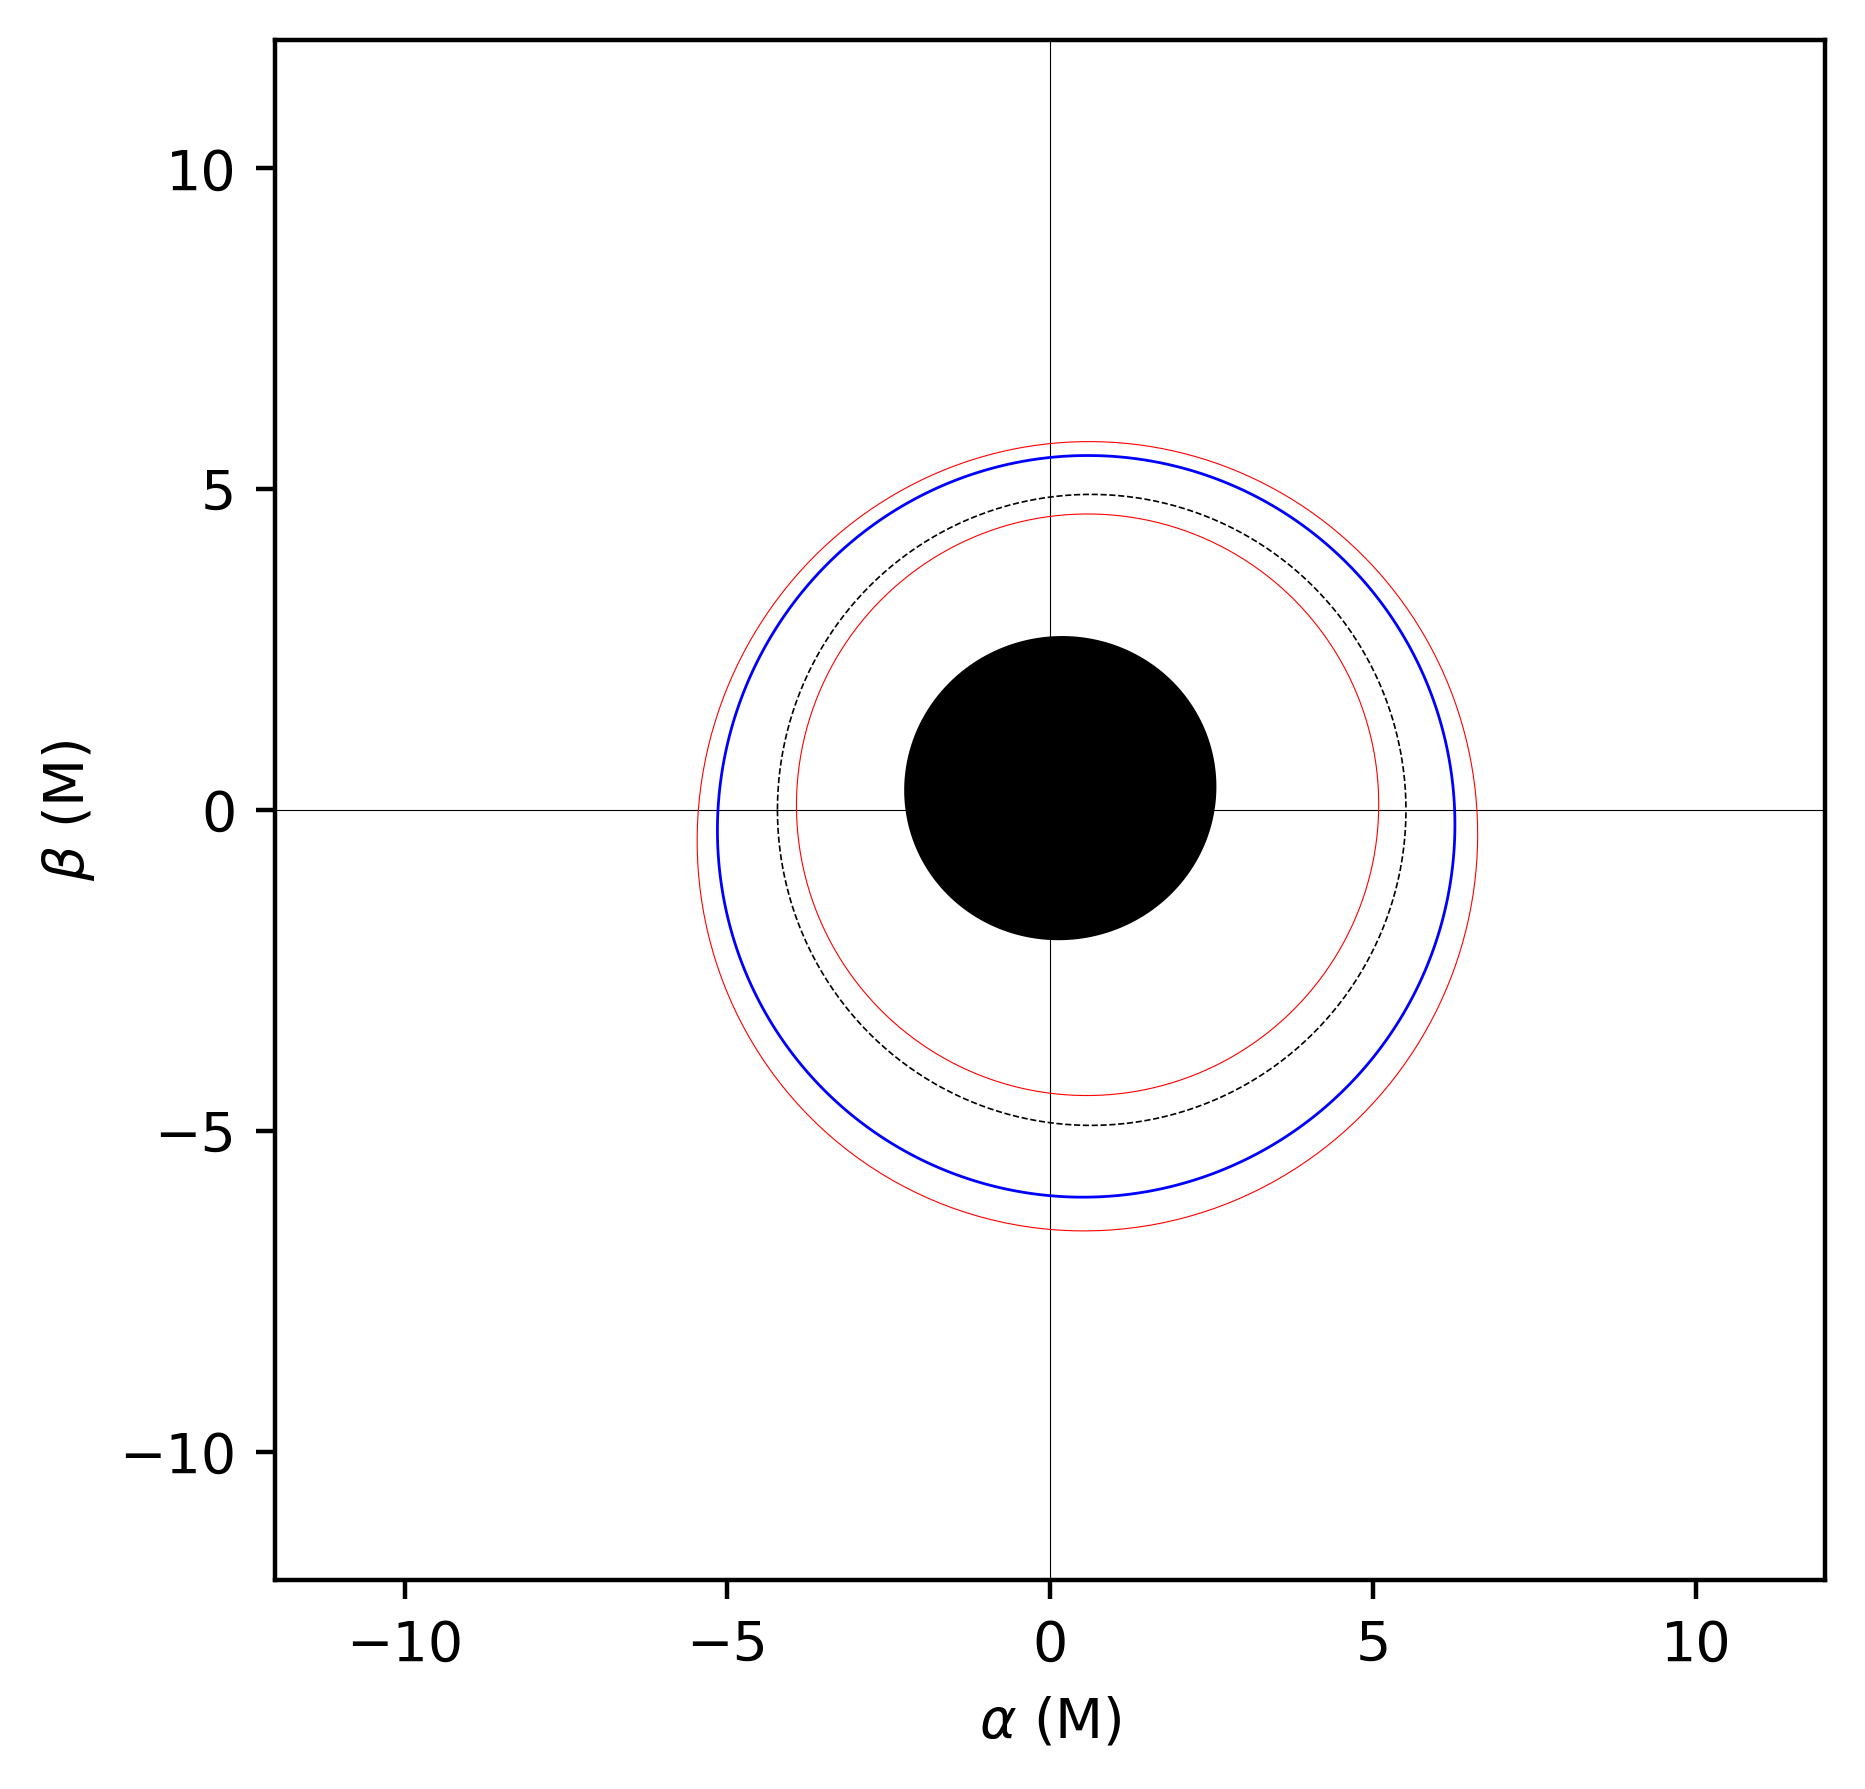

In [7]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")

ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
#ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

CSr=ax.contour(rs1.reshape(N1,N1).T,levels=[r_cutoff],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='blue')


ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

We select some (!) of the points of that contour. This number is something one may want to change. 

In [8]:
nPointCont=400

xs_HR=[]
ys_HR=[]
for i in range(len(CSr.allsegs[0])):
    v=CSr.collections[0].get_paths()[i].vertices
    for j in range(len(v[:,0])):
        xs_HR.append(v[:,0][j])
        ys_HR.append(v[:,1][j])
    
xs_HR=np.array(xs_HR)[::int(CSr.allsegs[0][0].shape[0]/nPointCont)]
ys_HR=np.array(ys_HR)[::int(CSr.allsegs[0][0].shape[0]/nPointCont)]
hull_1e_r=np.array([xs_HR,ys_HR]).T

Now, we check if it looks good (and we did it correctly!)

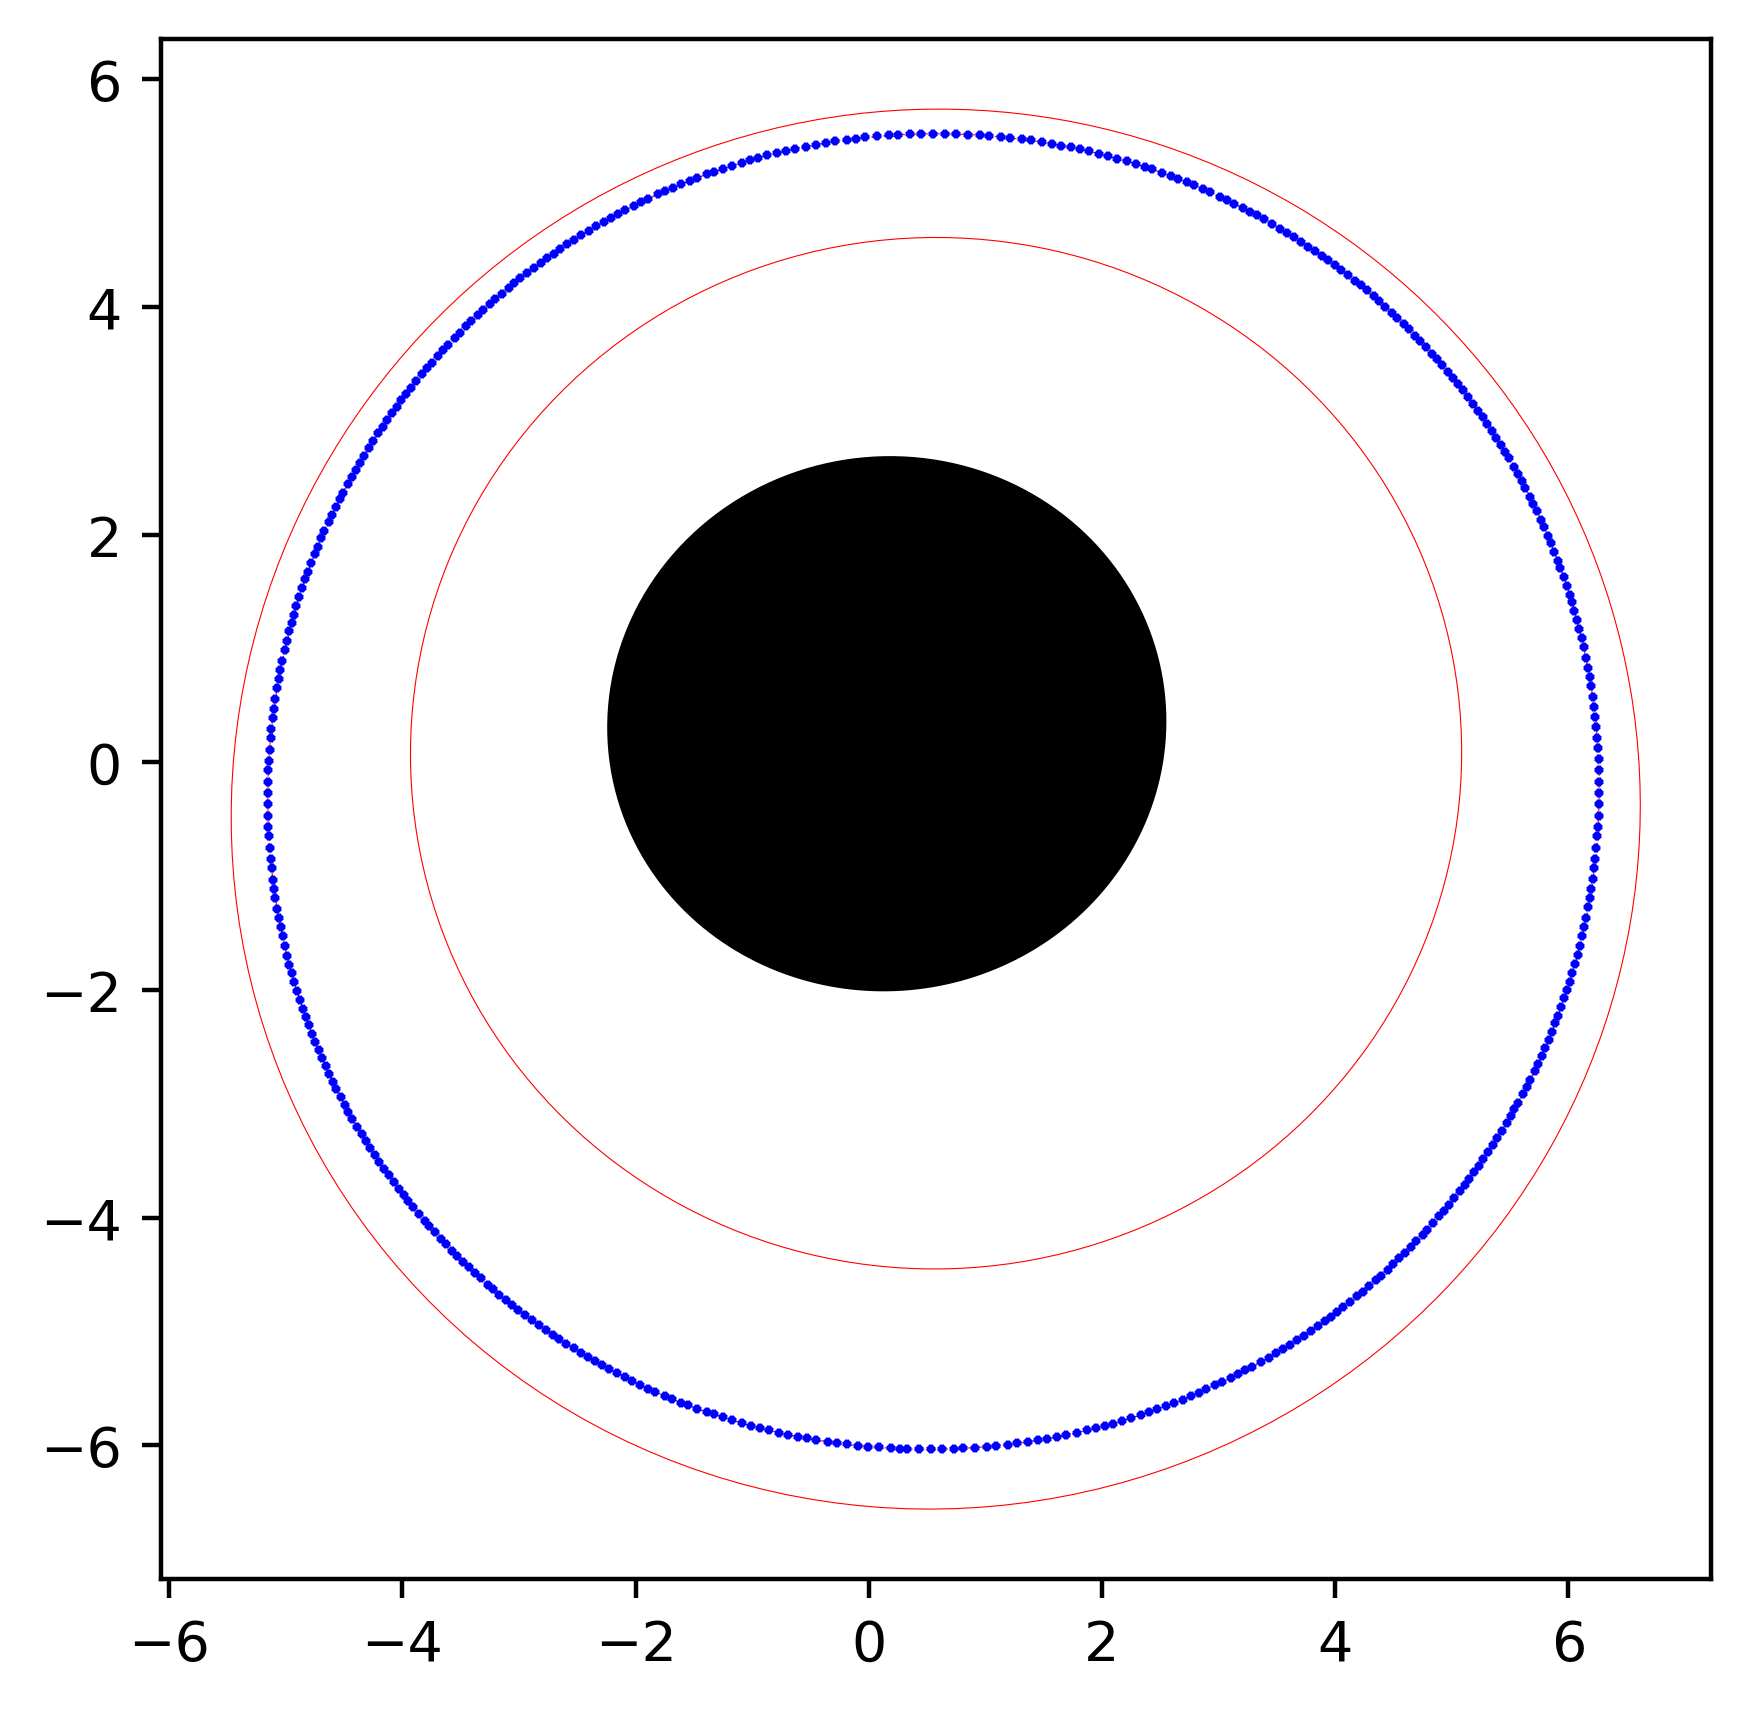

In [9]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")

ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)

ax.plot(hull_1e_r[:,0],hull_1e_r[:,1],'r--',linewidth=0.2)

ax.plot(xs_HR,ys_HR,"bx",markersize=1)

Now, let us create new indices for a new lensing band

In [10]:
mask1_r=np.invert(lb.in_hull(supergrid1,hull_1i))
mask2_r=lb.in_hull(supergrid1,hull_1e_r)
indexes_r=mask2_r*mask1_r

And, now, we can save the results in a new file

In [11]:
filename=path+"LensingBands_a_%s_i_%s_r.h5"%(spin_case,i_case)
h5f = h5py.File(filename, 'w')
h5f.create_dataset('mask1_r', data=indexes_r)
h5f.create_dataset('hull_1e_r', data=hull_1e_r)
h5f.close()

Finally, we can plot everything together! Blue portion will be the new grid

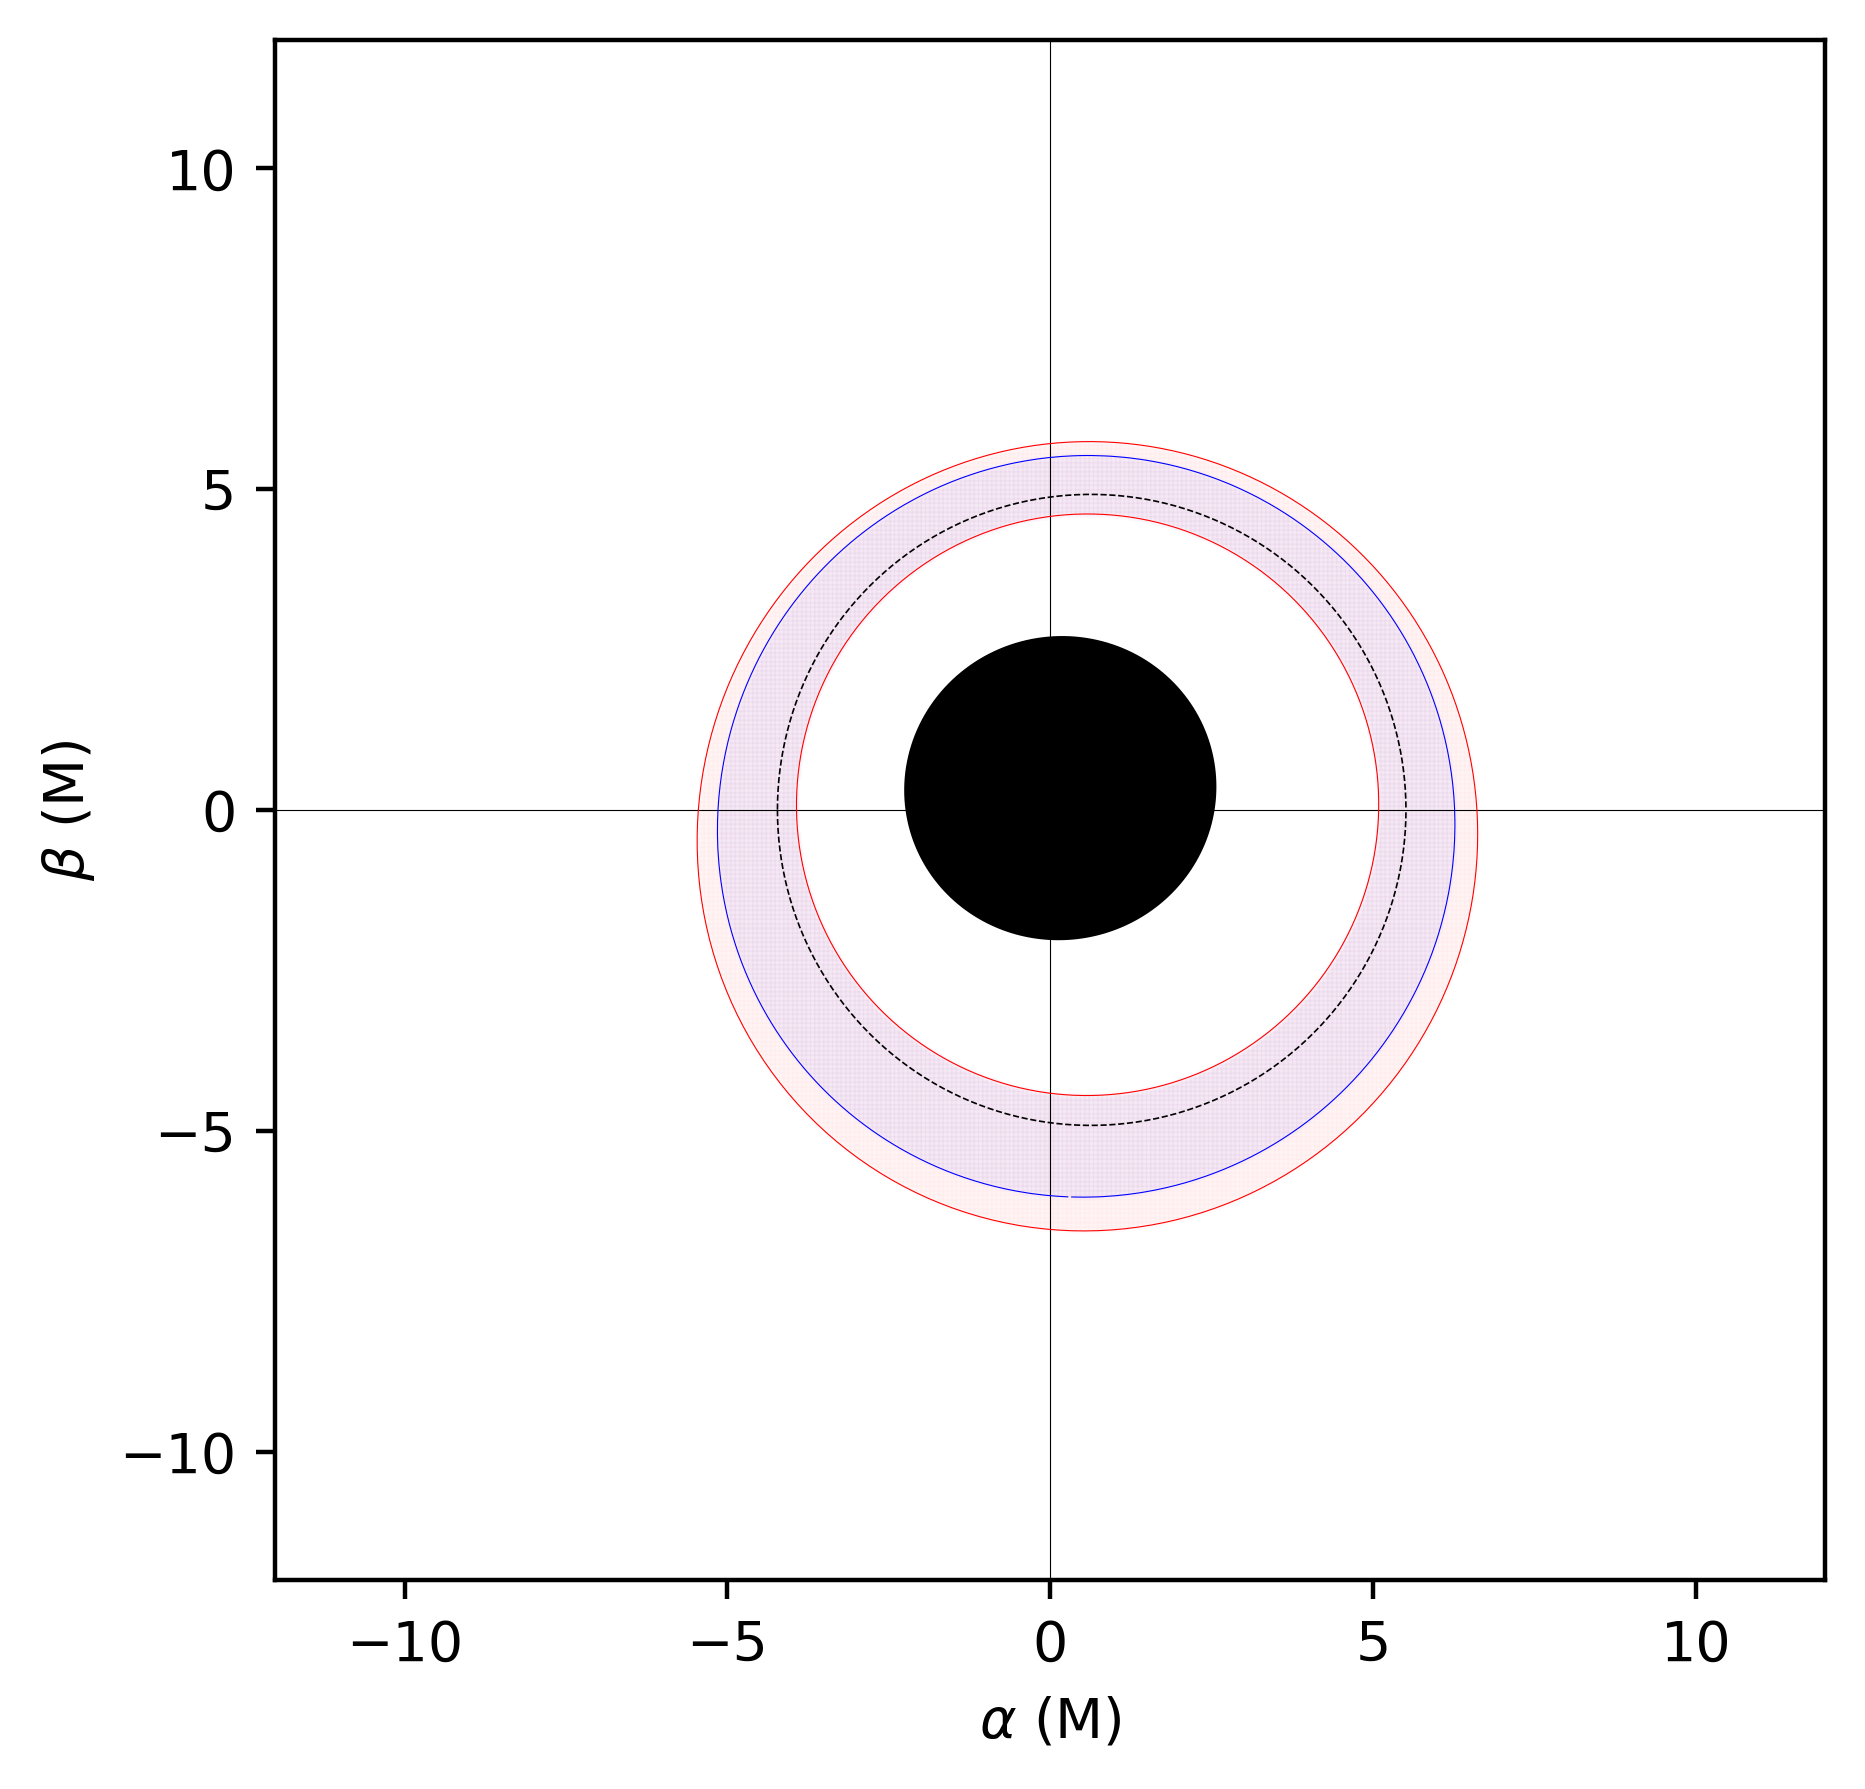

In [12]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)

ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)


ax.plot(hull_1e_r[:,0],hull_1e_r[:,1],'b',linewidth=0.2)
ax.scatter(supergrid1[:,0][indexes_r],supergrid1[:,1][indexes_r],color="b",marker=".",s=.00001,alpha=0.5)

ax.set_xlim(-12,12)
ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

plt.savefig('LB_Restricted.png',dpi=400,bbox_inches='tight')

plt.show()

## License

MIT license

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software 
without restriction, including without limitation the rights to use, copy, modify, merge, 
publish, distribute, sublicense, and/or sell copies of the Software, and to permit 
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR 
PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE 
FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, 
ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN 
THE SOFTWARE.